<a href="https://colab.research.google.com/github/EloizioHMD/geopython/blob/main/NB_Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Atualizadar as Dependências

Para trabalhar com dados georreferenciados, será utilizada a biblioteca GeoPandas, em sua versão mais recente: 0.13.2. O `GeoPandas` já vem instalado no Colab, mas se quiser acompanhar o curso na mesma versão, é necessário instalar a GeoPandasexecutando o código abaixo em uma célula do seu notebook de aula:

In [1]:
!pip install --upgrade geopandas
!pip install fiona==1.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 4.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fiona
  Running setup.py clean for fiona
Failed to build fiona
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (fiona)


## Introdução a **GeoPandas**

In [2]:
url = 'https://github.com/EloizioHMD/geopython/raw/refs/heads/main/RJ_Municipios_2022/RJ_Municipios_2022.shp'

In [3]:
import geopandas as gpd

In [4]:
rj = gpd.read_file(url)

In [5]:
rj.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3300100,Angra dos Reis,RJ,813.420,"MULTIPOLYGON (((-44.51649 -23.03589, -44.51633..."
1,3300159,Aperibé,RJ,94.542,"POLYGON ((-42.11437 -21.61204, -42.11394 -21.6..."
2,3300209,Araruama,RJ,638.276,"POLYGON ((-42.28399 -22.93928, -42.28444 -22.9..."
3,3300225,Areal,RJ,110.724,"POLYGON ((-43.09004 -22.23844, -43.09135 -22.2..."
4,3300233,Armação dos Búzios,RJ,70.977,"MULTIPOLYGON (((-41.91872 -22.77162, -41.91854..."


In [6]:
type(rj)

geopandas.geodataframe.GeoDataFrame

<Axes: >

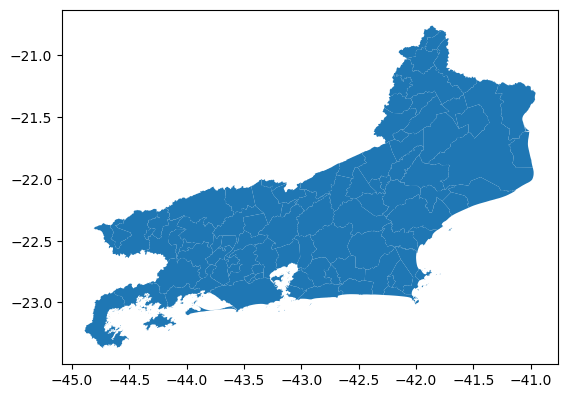

In [7]:
rj.plot()

<Axes: >

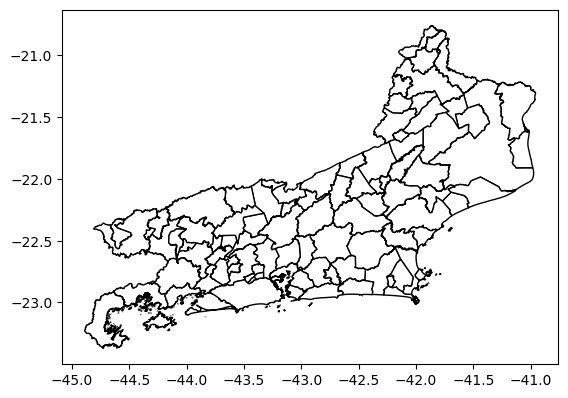

In [8]:
rj.plot(color='white', edgecolor='black')

Finalizada essa parte introdutória, segue uma orientação de boa leitura sobre o tema.

[Georreferenciamento: o que é, uso e ferramentas](https://www.alura.com.br/artigos/georreferenciamento-uso-ferramentas)

[Geomarketing: O Que É e Como Usar Com Estas 7 Ferramentas](https://neilpatel.com/br/blog/geomarketing-o-que-e/)

## Trabalhando com Shapefile

In [9]:
rj_rio = rj[rj['NM_MUN']=='Rio de Janeiro']

<Axes: >

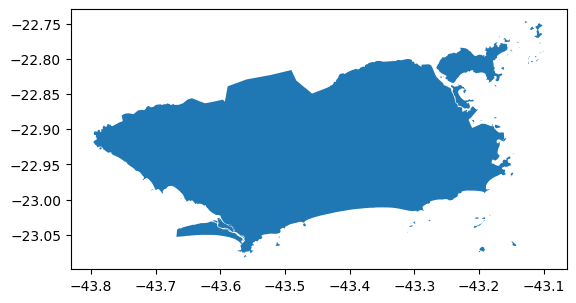

In [10]:
rj_rio.plot()

In [11]:
rj_rio.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
67,3304557,Rio de Janeiro,RJ,1200.329,"MULTIPOLYGON (((-43.66048 -22.99958, -43.6605 ..."


In [12]:
rj_rio.to_file('rj_rio.shp')  # Salvar o arquivo

## Relacionar com dados sobre valores de imóveis

In [13]:
import pandas as pd

In [14]:
url = 'https://github.com/EloizioHMD/geopython/raw/refs/heads/main/RJ_Municipios_2022/dados_rj.csv'

In [15]:
df = pd.read_csv(url, sep='\t')

In [16]:
df.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000


In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
list(zip(df['Longitude'], df['Latitude']))

[(-43.4629464, -23.0164552),
 (-43.3369111, -22.9431995),
 (-43.300517, -22.873849),
 (-43.4127033, -22.9847874),
 (-51.92528, -14.235004),
 (-43.4775047, -23.0189271),
 (-43.2471087, -22.9335749),
 (-43.192534, -22.9823004),
 (-51.92528, -14.235004),
 (-43.175411, -22.9364023),
 (-43.262945, -22.918533),
 (-49.0606445, -26.9225709),
 (-43.303056, -23.013213),
 (-43.1698189, -22.952982),
 (-43.1849587, -22.9706444),
 (-43.3548121, -23.0097423),
 (-49.0606445, -26.9225709),
 (-43.3461644, -22.938107),
 (-43.1819538, -22.9497255),
 (-43.2327966, -22.9218818),
 (-43.3939698, -22.9995191),
 (-43.2808515, -22.9055097),
 (-43.1875152, -22.934498),
 (-43.5016663, -23.0191083),
 (-43.4590496, -23.023215),
 (-43.2339034, -22.9936095),
 (-43.1987716, -22.985368),
 (-43.2308106, -22.9771863),
 (-43.2525968, -22.9267666),
 (-51.92528, -14.235004),
 (-43.1852932, -22.9705243),
 (-43.4178323, -22.9990708),
 (-43.3079711, -23.0141101),
 (-43.350626, -22.988612),
 (-43.4152111, -22.9980081),
 (-43.199

In [19]:
from shapely import Point

In [20]:
pontos_geom = [Point(x) for x in zip(df['Longitude'], df['Latitude'])]  # Lista de objetos Point

In [21]:
pontos_geom

[<POINT (-43.463 -23.016)>,
 <POINT (-43.337 -22.943)>,
 <POINT (-43.301 -22.874)>,
 <POINT (-43.413 -22.985)>,
 <POINT (-51.925 -14.235)>,
 <POINT (-43.478 -23.019)>,
 <POINT (-43.247 -22.934)>,
 <POINT (-43.193 -22.982)>,
 <POINT (-51.925 -14.235)>,
 <POINT (-43.175 -22.936)>,
 <POINT (-43.263 -22.919)>,
 <POINT (-49.061 -26.923)>,
 <POINT (-43.303 -23.013)>,
 <POINT (-43.17 -22.953)>,
 <POINT (-43.185 -22.971)>,
 <POINT (-43.355 -23.01)>,
 <POINT (-49.061 -26.923)>,
 <POINT (-43.346 -22.938)>,
 <POINT (-43.182 -22.95)>,
 <POINT (-43.233 -22.922)>,
 <POINT (-43.394 -23)>,
 <POINT (-43.281 -22.906)>,
 <POINT (-43.188 -22.934)>,
 <POINT (-43.502 -23.019)>,
 <POINT (-43.459 -23.023)>,
 <POINT (-43.234 -22.994)>,
 <POINT (-43.199 -22.985)>,
 <POINT (-43.231 -22.977)>,
 <POINT (-43.253 -22.927)>,
 <POINT (-51.925 -14.235)>,
 <POINT (-43.185 -22.971)>,
 <POINT (-43.418 -22.999)>,
 <POINT (-43.308 -23.014)>,
 <POINT (-43.351 -22.989)>,
 <POINT (-43.415 -22.998)>,
 <POINT (-43.199 -22.981)>,

In [22]:
crs = {'init': 'epsg:4326'}  # Coordinate Reference System
geodados = gpd.GeoDataFrame(df, crs=crs, geometry=pontos_geom)    # GeoDataFrame
geodados

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (-43.46295 -23.01646)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (-43.33691 -22.9432)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (-43.30052 -22.87385)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (-43.4127 -22.98479)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-51.92528 -14.235)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (-43.55076 -22.87835)
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (-43.48729 -23.02472)
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (-43.20618 -22.95943)
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (-43.26049 -22.91877)


In [23]:
geodados.to_file('dataset.shp')

<Axes: >

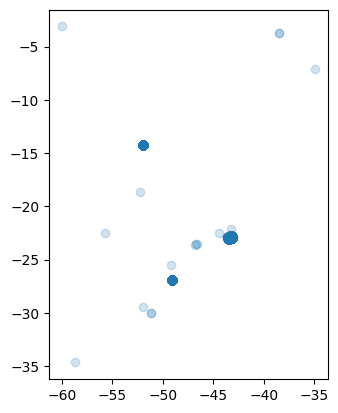

In [24]:
geodados.plot(alpha=0.2)  # alpha controla a transparência

O formato shapefile é utilizado para armazenar dados geográficos vetoriais. Um shapefile consiste em pelo menos três arquivos com as extensões .shp, .shx e .dbf, que contêm, respectivamente, as geometrias, os índices e os atributos dos dados espaciais. Além desses arquivos, um shapefile pode ter outros arquivos opcionais, como os listados abaixo:

    .prj, que define o sistema de coordenadas;
    .sbn e .sbx, que armazenam índices espaciais;
    .cpg, que especifica a codificação de caracteres; e
    .xml, que contém metadados.

Esse formato foi desenvolvido pela empresa Esri, líder em sistemas de informação geográfica (SIG), e é amplamente utilizado por profissionais e organizações que trabalham com dados geoespaciais. O formato shapefile tem algumas vantagens, como ser simples, compacto e portátil, mas também apresenta algumas limitações, como não suportar geometrias curvas, topologias complexas ou tipos de dados não numéricos. Além disso, o formato shapefile tem um limite de tamanho de 2 GB por arquivo, o que pode ser um problema para conjuntos de dados muito grandes.


## Composição de Mapas

In [25]:
rj_rio.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [26]:
geodados.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Transformar os dados para a mesma zona UTM para colocar os dados para o mesmo CRS.

In [27]:
rj_rio.to_crs(epsg=31983, inplace=True) # alterando o crs do dado.

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [28]:
rj_rio.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [29]:
geodados.to_crs(epsg=31983, inplace=True)

<Axes: >

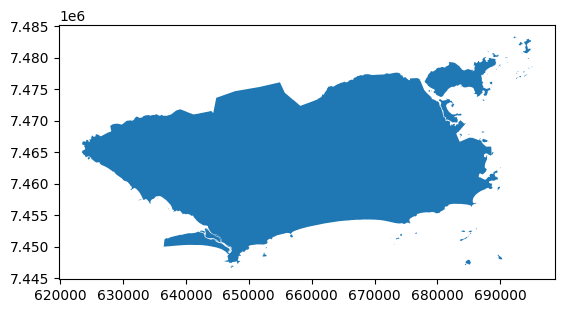

In [30]:
rj_rio.plot()

### Filtragem dos dados para uma única geometrica de interesse

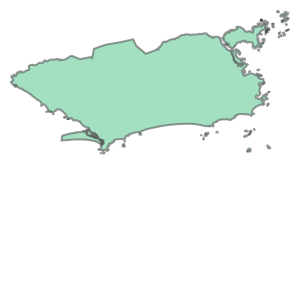

In [31]:
rj_rio.iloc[0].geometry

In [32]:
geodados.iloc[0].geometry.within(rj_rio.iloc[0].geometry) # Verificar se a geometria está contida dentro da outra.

True

In [33]:
geodados.shape # Quantidade de pontos antes do filtro

(5000, 14)

In [34]:
geodados = geodados[geodados['geometry'].within(rj_rio.iloc[0].geometry)] # filtro

In [35]:
geodados.shape # Quantidade de pontos depois do filtro

(4513, 14)

<Axes: >

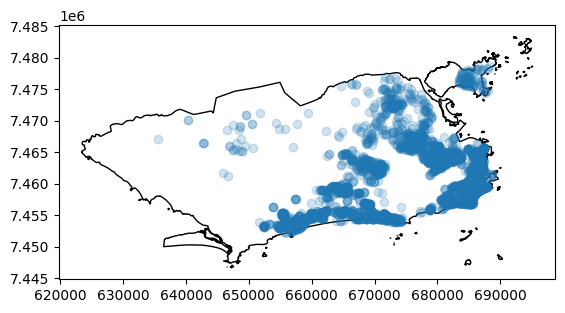

In [36]:
base = rj_rio.plot(color='white', edgecolor='black')
geodados.plot(ax=base, alpha=0.2)

### Agregando mais dados para relacionar o preço dos imóveis

In [37]:
url_m = 'https://github.com/EloizioHMD/geopython/raw/refs/heads/main/RJ_Municipios_2022/metro.geojson'

In [38]:
metro = gpd.read_file(url_m)

In [39]:
metro = metro.to_crs(epsg=31983)

<Axes: >

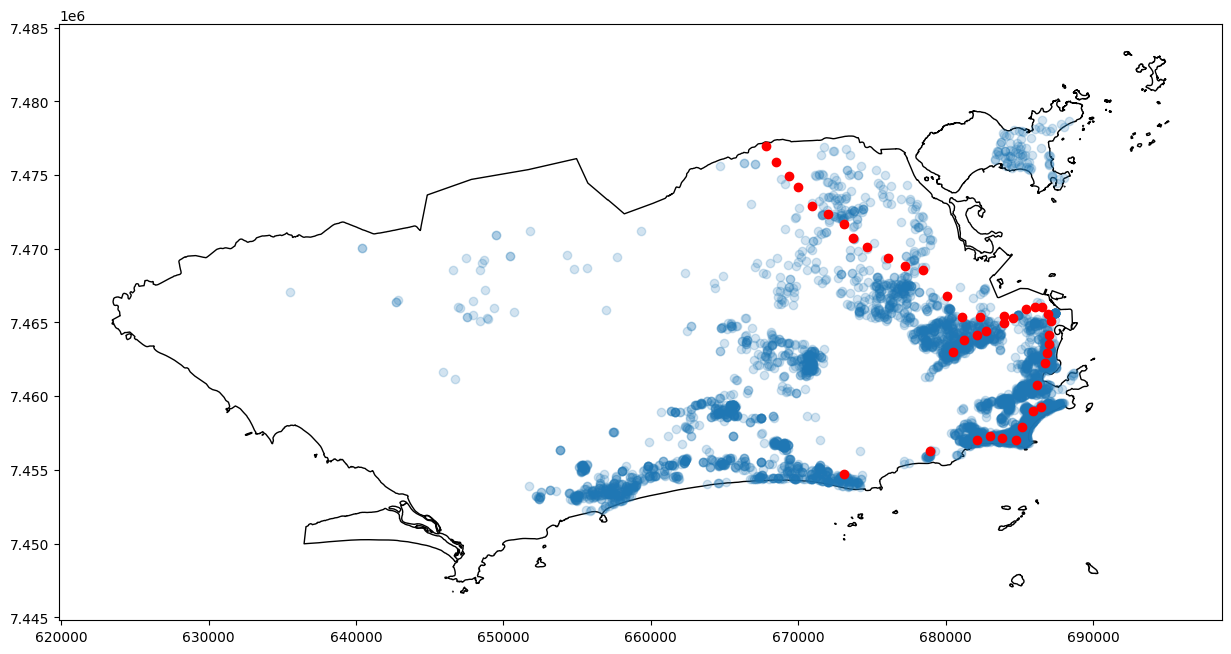

In [40]:
base = rj_rio.plot(color='white', edgecolor='black', figsize=(15, 8))
geodados.plot(ax=base, alpha=0.2)
metro.plot(ax=base, color='red')

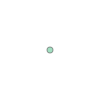

In [41]:
geodados.iloc[0].geometry

In [42]:
distancia = metro.distance(geodados.iloc[0].geometry) # distancia de um ponto para todos os pontos do metro


In [43]:
distancia.min()

15618.532512237687

Alternativa para criar uma correlação. Para evitar o erro, nos momentos em que o instrutor calcula a correlação você deve importar a biblioteca Numpy e criar um novo DataFrame apenas com as colunas numéricas.

In [44]:
geodados['Dist_metro'] = geodados['geometry'].apply(lambda x: metro.distance(x).min())

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [45]:
import numpy as np

geodados_num = geodados.select_dtypes(include=[np.number])
correlacao = geodados_num.corr()


<Axes: >

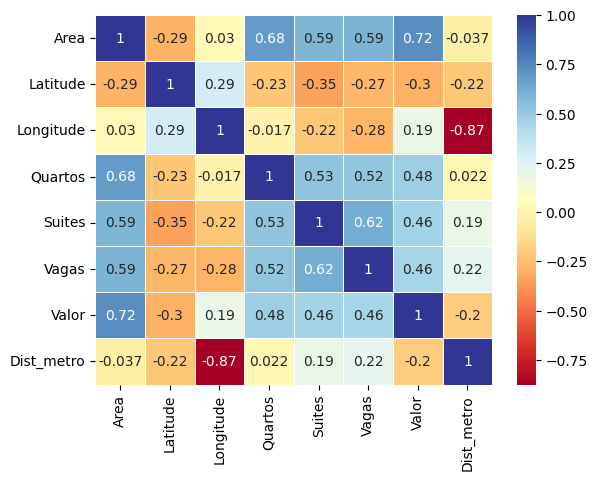

In [46]:
import seaborn as sns
sns.heatmap(correlacao, annot=True, cmap='RdYlBu', linewidths=0.5)

Existe uma correlação com o metro, inversa. Na medida que a distância entre o metro diminuí o preço aumenta.

### Agregando outros dados à análise

In [47]:
url_b = 'https://raw.githubusercontent.com/EloizioHMD/geopython/refs/heads/main/RJ_Municipios_2022/brt.geojson'
url_t = 'https://raw.githubusercontent.com/EloizioHMD/geopython/refs/heads/main/RJ_Municipios_2022/trem.geojson'

In [48]:
trem = gpd.read_file(url_t)
brt = gpd.read_file(url_b)

In [49]:
trem = trem.to_crs(epsg=31983)
brt = brt.to_crs(epsg=31983)

In [50]:
trem = trem[trem.within(rj_rio.iloc[0].geometry)]

In [51]:
brt = brt[brt.within(rj_rio.iloc[0].geometry)]

<Axes: >

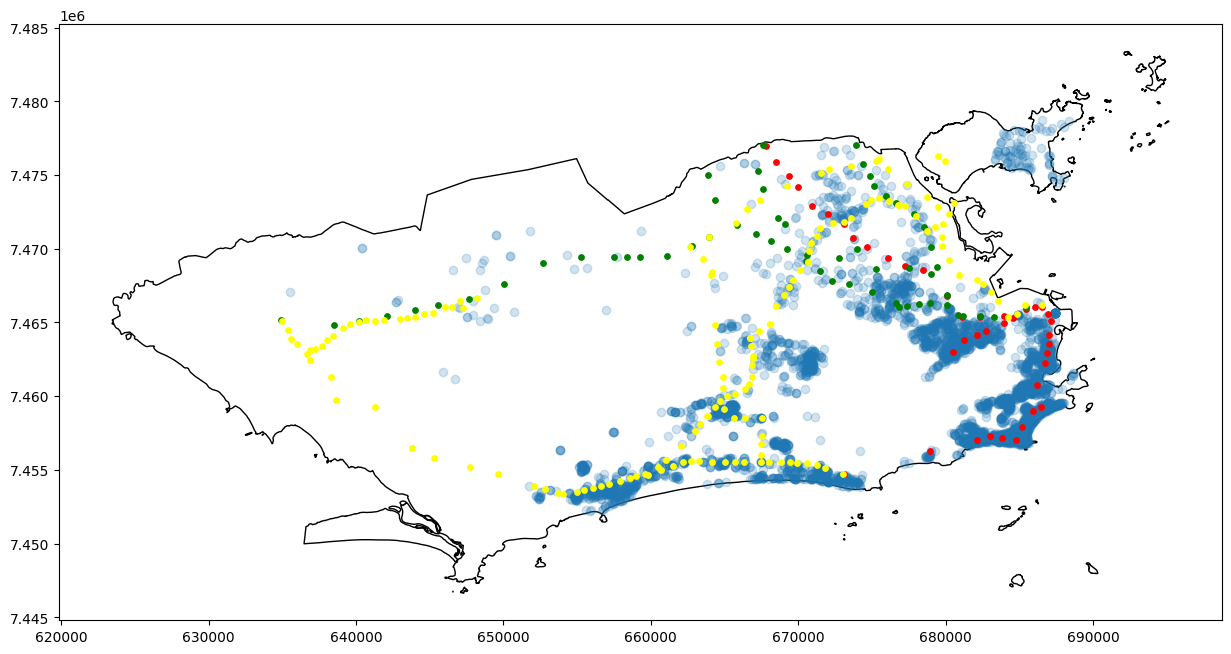

In [52]:
base = rj_rio.plot(color='white', edgecolor='black', figsize=(15, 8))
geodados.plot(ax=base, alpha=0.2)
metro.plot(ax=base, color='red', markersize=15)
trem.plot(ax=base, color='green', markersize=15)
brt.plot(ax=base, color='Yellow', markersize=15)

In [53]:
transporte = pd.concat([trem.geometry, brt.geometry, metro.geometry], ignore_index=True)

In [54]:
geodados['Dist_transporte'] = geodados['geometry'].apply(lambda x: transporte.distance(x).min())

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

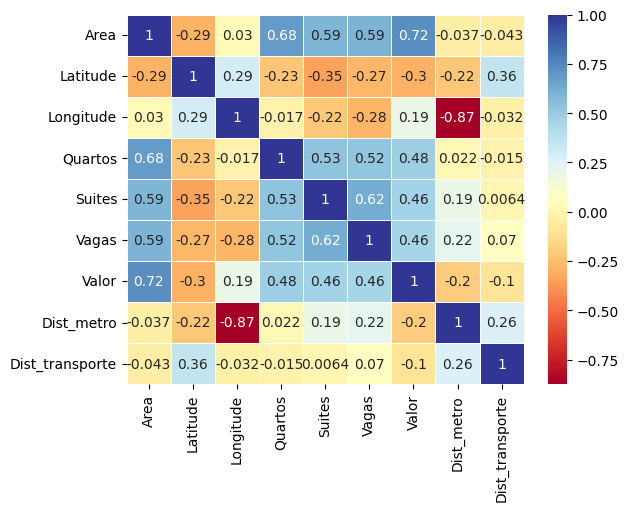

In [55]:
geodados_num = geodados.select_dtypes(include=[np.number])
correlacao = geodados_num.corr()
sns.heatmap(correlacao, annot=True, cmap='RdYlBu', linewidths=0.5)

Vamos agregar outro dado. Vamos verificar se a distância das praias influenciam no valor do imóvel. Para isso vamos usar o dado de [Uso e ocupação do solo do Rio](https://www.data.rio/datasets/cobertura-vegetal-e-uso-da-terra-2018/explore).

In [56]:
url_p = 'https://github.com/EloizioHMD/geopython/raw/refs/heads/main/RJ_Municipios_2022/Cobertura_Vegetal_e_Uso_da_Terra_2018/Cobertura_Vegetal_e_Uso_da_Terra_2018.shp'

In [57]:
praias = gpd.read_file(url_p)

In [60]:
praias['classe'].unique()

array(['Corpos d’água continentais', 'Vegetação gramíneo-lenhosa',
       'Formação Pioneira com influência marinha',
       'Vegetação arbórea não florestal', 'Áreas Urbanas', 'Praia',
       'Formação Pioneira com influência flúvio-marinh',
       'Formação Pioneira com influência flúvio-lacust', 'Uso agrícola',
       'Floresta Ombrófila Densa', 'Afloramento Rochoso', 'Solo exposto',
       'Reflorestamento', 'Atividades de Extração Mineral',
       'Corpos d’água costeiros'], dtype=object)

In [59]:
praias.to_crs(epsg=31983, inplace=True)

In [61]:
praias = praias[praias['classe']=='Praia']

<Axes: >

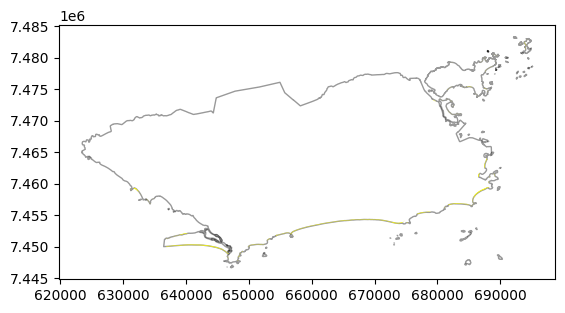

In [70]:
base = rj_rio.plot(color='white', edgecolor='black', alpha=0.4)
praias.plot(ax=base, color='yellow')

In [73]:
geodados['Dist_praia'] = geodados['geometry'].apply(lambda x: praias.distance(x).min())

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

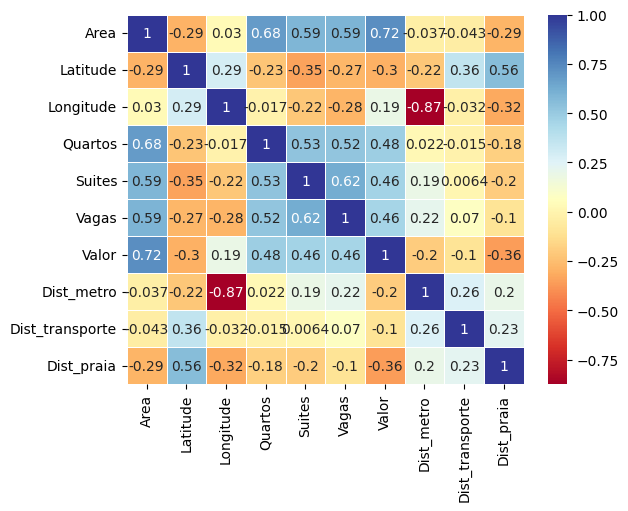

In [74]:
geodados_num = geodados.select_dtypes(include=[np.number])
correlacao = geodados_num.corr()
sns.heatmap(correlacao, annot=True, cmap='RdYlBu', linewidths=0.5)

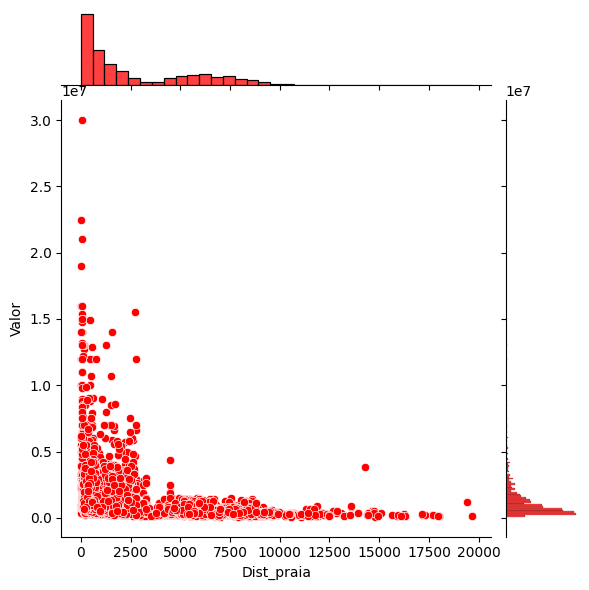

In [88]:
sns.jointplot(data=geodados, x='Dist_praia', y='Valor', color='red')

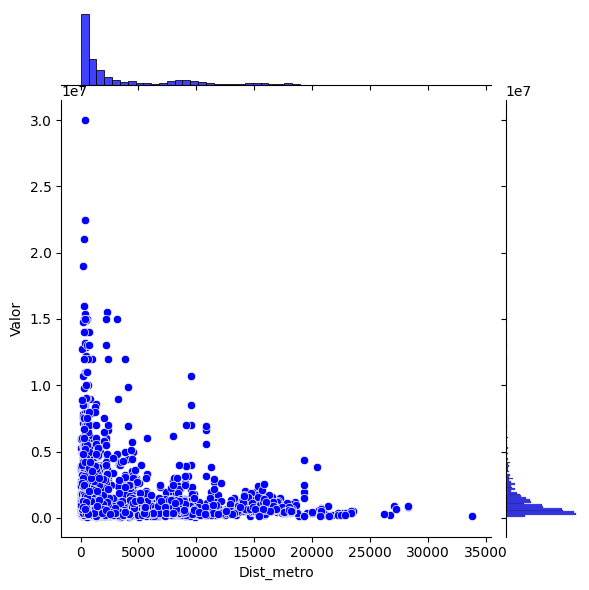

In [89]:
sns.jointplot(data=geodados, x='Dist_metro', y='Valor', color='blue')

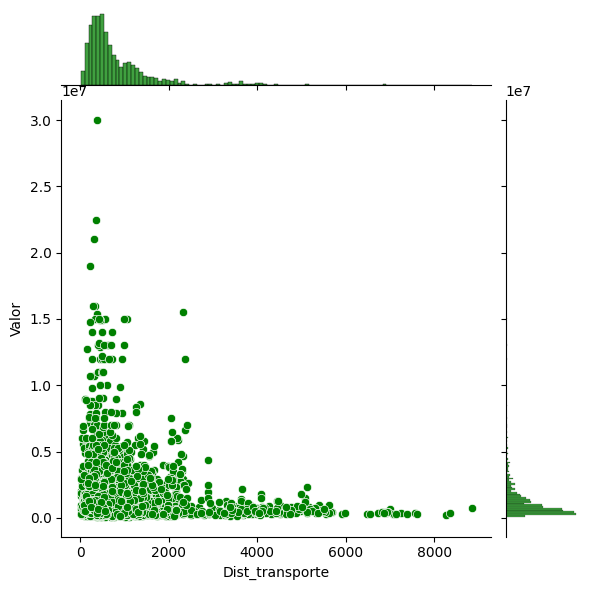

In [90]:
sns.jointplot(data=geodados, x='Dist_transporte', y='Valor', color='Green')